### Boston House Prediction using Regularization

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [111]:
from sklearn.datasets import load_boston

In [112]:
boston = load_boston()

In [113]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [114]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [115]:
boston['data'].shape

(506, 13)

In [116]:
boston['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [117]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [118]:
## Create dataframe for Boston House Price Dataset

df = pd.DataFrame(data = boston['data'], columns=boston['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [119]:
## Extract target from Boston Dataset

target = pd.Series(boston['target'])
df['Price'] = target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Quick EDA 

In [120]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
Price      float64
dtype: object

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [122]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [123]:
bsDesc = []

for i in df.columns:
    bsDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((df[i].isna().sum() / len(df)) * 100, 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [124]:
pd.DataFrame(data = bsDesc,
columns = [
    'Features',
    'DataType',
    'Null',
    'NullPercentage',
    'Unique',
    'Unique Sample'
])

,Features,DataType,Null,NullPercentage,Unique,Unique Sample
0,CRIM,float64,0,0.0,504,"[0.03359, 0.35809]"
1,ZN,float64,0,0.0,26,"[70.0, 21.0]"
2,INDUS,float64,0,0.0,76,"[2.46, 21.89]"
3,CHAS,float64,0,0.0,2,"[1.0, 0.0]"
4,NOX,float64,0,0.0,81,"[0.547, 0.51]"
5,RM,float64,0,0.0,446,"[5.036, 6.8]"
6,AGE,float64,0,0.0,356,"[70.6, 49.0]"
7,DIS,float64,0,0.0,412,"[1.3449, 1.1296]"
8,RAD,float64,0,0.0,9,"[1.0, 24.0]"
9,TAX,float64,0,0.0,66,"[226.0, 422.0]"


We don't see any anomalies and missing value from the dataset. Thus, we can proceed with our analysis.

<function matplotlib.pyplot.show(close=None, block=None)>

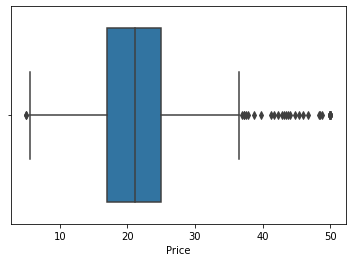

In [125]:
sns.boxplot(df['Price'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

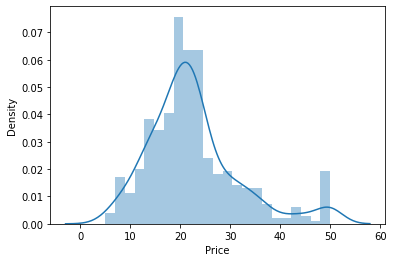

In [126]:
sns.distplot(df['Price'])
plt.show

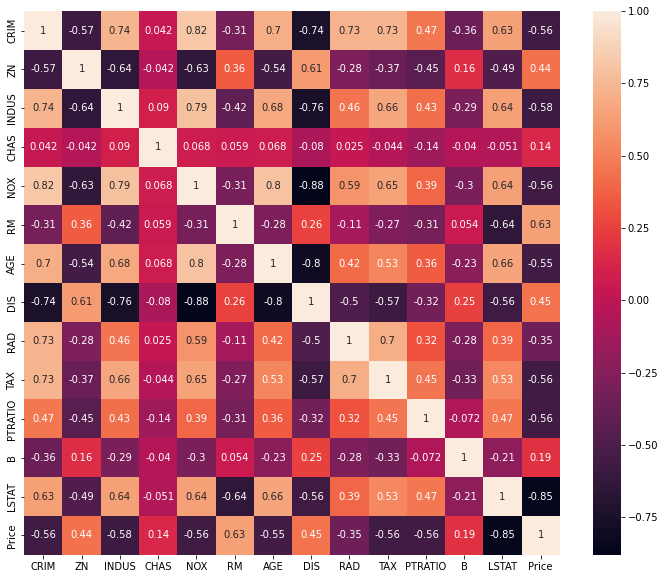

In [127]:
### We use spearman correlation test because the target data distrbution is skewed

plt.figure(figsize=(12,10))
sns.heatmap(df.corr('spearman'), annot=True)
plt.show()

## Feature Engineering & Feature Selection

### Feature Selection

- We will drop features with spearman's r value less than 0.5

In [128]:
df.drop(columns=['ZN', 'CHAS', 'DIS', 'RAD', 'B'], inplace=True) ## Dropping features with less than 0.5 r-value

In [129]:
df.head()

,CRIM,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT,Price
0,0.00632,2.31,0.538,6.575,65.2,296.0,15.3,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,242.0,17.8,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,242.0,17.8,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,222.0,18.7,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,222.0,18.7,5.33,36.2


In [130]:
## Create x and y variables

X = df.drop(columns='Price')
y = df['Price']

## Splitting Dataset

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .15, random_state= 666)

In [133]:
X_train.head() ## Training Data

,CRIM,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT
401,14.23620,18.10,0.693,6.343,100.0,666.0,20.2,20.32
321,0.18159,7.38,0.493,6.376,54.3,287.0,19.6,6.87
336,0.03427,5.19,0.515,5.869,46.3,224.0,20.2,9.80
55,0.01311,1.22,0.403,7.249,21.9,226.0,17.9,4.81
307,0.04932,2.18,0.472,6.849,70.3,222.0,18.4,7.53


In [134]:
X_test.head() ## Testing Data

,CRIM,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT
81,0.04462,4.86,0.426,6.619,70.4,281.0,19.0,7.22
453,8.24809,18.10,0.713,7.393,99.3,666.0,20.2,16.74
311,0.79041,9.90,0.544,6.122,52.8,304.0,18.4,5.98
291,0.07886,4.95,0.411,7.148,27.7,245.0,19.2,3.56
360,4.54192,18.10,0.770,6.398,88.0,666.0,20.2,7.79


In [135]:
y_train.head() ## Training target

401     7.2
321    23.1
336    19.5
55     35.4
307    28.2
Name: Price, dtype: float64

In [136]:
y_test.head() ## Testing target

81     23.9
453    17.8
311    22.1
291    37.3
360    25.0
Name: Price, dtype: float64

### Machine Learning Modelling

In [137]:
from sklearn.linear_model import LinearRegression

In [138]:
Model = LinearRegression ()

In [139]:
Model.fit(X_train, y_train)

LinearRegression()

In [140]:
Model.score(X_train, y_train) ## Training model evaluation score

0.6794216692677977

In [141]:
Model.score(X_test, y_test) ## Testing model evaluation score

0.7177211522166613

In [142]:
Model.coef_

array([-3.88339846e-02,  9.06543185e-02, -9.13232454e+00,  4.07661631e+00,
        4.33614151e-02, -1.06780067e-03, -1.00867310e+00, -6.25672088e-01])

In [143]:
X_train.columns

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')

In [144]:
pd.DataFrame(data = Model.coef_, index=X_train.columns, columns=['Coef']) ## Show the coefficient of each features

,Coef
CRIM,-0.038834
INDUS,0.090654
NOX,-9.132325
RM,4.076616
AGE,0.043361
TAX,-0.001068
PTRATIO,-1.008673
LSTAT,-0.625672


## Evaluation Metrics

In [145]:
pred_train = Model.predict(X_train)

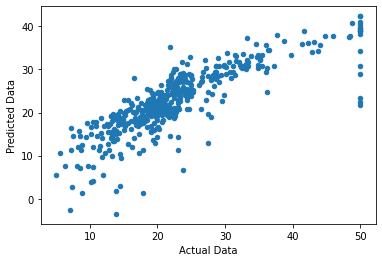

In [146]:
plt.scatter(y_train, pred_train, s=20)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.show()

In [147]:
pred_test = Model.predict(X_test)

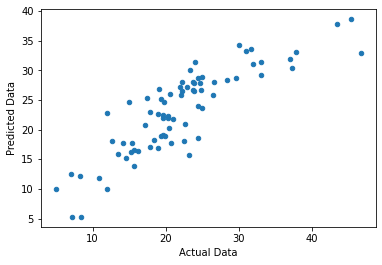

In [148]:
plt.scatter(y_test, pred_test, s=20)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.show()

In [149]:
Training_set = pd.concat([X_train, y_train], axis = 1)

In [150]:
Testing_set = pd.concat([X_test, y_test], axis = 1)

## Analyzing Error on Training Set

In [151]:
Training_set['price_pred'] = pred_train

In [152]:
Training_set

,CRIM,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT,Price,price_pred
401,14.23620,18.10,0.693,6.343,100.0,666.0,20.2,20.32,7.2,16.435031
321,0.18159,7.38,0.493,6.376,54.3,287.0,19.6,6.87,23.1,25.413580
336,0.03427,5.19,0.515,5.869,46.3,224.0,20.2,9.80,19.5,20.234969
55,0.01311,1.22,0.403,7.249,21.9,226.0,17.9,4.81,35.4,30.906342
307,0.04932,2.18,0.472,6.849,70.3,222.0,18.4,7.53,28.2,28.627986
...,...,...,...,...,...,...,...,...,...,...
318,0.40202,9.90,0.544,6.382,67.2,304.0,18.4,10.36,23.1,24.760201
414,45.74610,18.10,0.693,4.519,100.0,666.0,20.2,36.98,7.0,-2.648069
429,9.33889,18.10,0.679,6.380,95.6,666.0,20.2,24.08,9.5,14.360583
386,24.39380,18.10,0.700,4.652,100.0,666.0,20.2,28.28,10.5,4.102737


In [153]:
Training_set['Error'] = abs(Training_set['Price'] - Training_set['price_pred'])

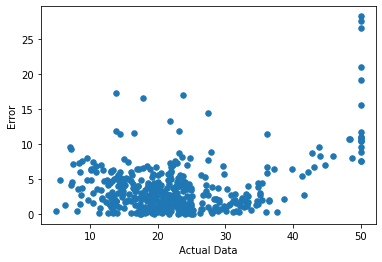

In [154]:
plt.scatter(Training_set['Price'], Training_set['Error'], s=30)
plt.xlabel("Actual Data")
plt.ylabel("Error")
plt.show()

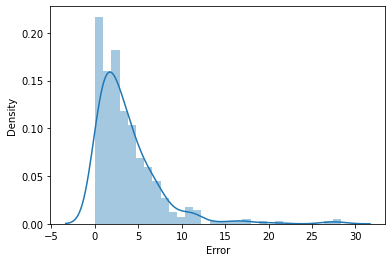

In [155]:
sns.distplot(Training_set['Error'])
plt.show()

In [156]:
Training_set['Error'].mean()

3.6921716933210975

We can see both from scatterplot and histogram that the error is not normally distributed.

In [157]:
Training_set.sort_values('Error', ascending=False).head(10) ## Show 10 highest error value

,CRIM,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT,Price,price_pred,Error
372,8.26725,18.10,0.668,5.875,89.6,666.0,20.2,8.88,50.0,21.694011,28.305989
368,4.89822,18.10,0.631,4.970,100.0,666.0,20.2,3.26,50.0,22.440638,27.559362
371,9.23230,18.10,0.631,6.216,100.0,666.0,20.2,9.53,50.0,23.428828,26.571172
369,5.66998,18.10,0.631,6.683,96.8,666.0,20.2,3.73,50.0,28.961089,21.038911
370,6.53876,18.10,0.631,7.016,97.5,666.0,20.2,2.96,50.0,30.796984,19.203016
374,18.49820,18.10,0.668,4.138,100.0,666.0,20.2,37.97,13.8,-3.534222,17.334222
214,0.28955,10.59,0.489,5.412,9.8,277.0,18.6,29.55,23.7,6.706584,16.993416
412,18.81100,18.10,0.597,4.628,100.0,666.0,20.2,34.37,17.9,1.351987,16.548013
186,0.05602,2.46,0.488,7.831,53.6,193.0,17.8,4.45,50.0,34.349334,15.650666
365,4.55587,18.10,0.718,3.561,87.9,666.0,20.2,7.12,27.5,12.975701,14.524299


We can see that 8 out of 10 biggest error, have a 666 value on tax feature.

### Machine Learning Model Improvement
- Project Limitation: Drop all row with 666 value on 'tax' feature

In [158]:
df = df[df['TAX'] != 666]

## Machine Learning Improvement (Feature Engineering) with Polynomial

In [159]:
from sklearn.preprocessing import PolynomialFeatures

In [160]:
X = df.drop(columns='Price')
y = df['Price']

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= .80, random_state=42)

In [162]:
Poly = PolynomialFeatures(degree=3, include_bias=False, interaction_only=True)

In [163]:
Poly = Poly.fit(X_train)

In [164]:
X_trainPoly = Poly.transform(X_train)
X_testPoly = Poly.transform(X_test)

In [165]:
## Create dataframe for Polynomial Features

df_XtrainPoly = pd.DataFrame(X_trainPoly)
df_XtrainPoly.head()

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,91
0,0.08664,3.44,0.437,7.178,26.3,398.0,15.2,2.87,0.298042,0.037862,...,75134.9972,2869.47728,541.802618,43424.0288,8199.14228,313.133072,159104.48,30041.438,1147.3112,17362.352
1,0.09512,12.83,0.437,6.286,45.0,398.0,18.7,8.94,1.220390,0.041567,...,112582.2600,5289.66900,2528.857800,46784.1836,22366.34232,1050.880908,334917.00,160115.400,7523.0100,66536.844
2,0.05059,4.49,0.449,6.389,48.0,247.0,18.5,9.62,0.227149,0.022715,...,75747.9840,5673.43200,2950.184640,29194.5355,15181.15846,1137.050330,219336.00,114054.720,8542.5600,43958.590
3,0.27957,9.69,0.585,5.926,42.6,391.0,19.2,13.59,2.709033,0.163548,...,98707.0116,4846.99392,3430.762884,44487.6672,31488.92694,1546.259328,319806.72,226363.194,11115.5328,102022.848
4,1.05393,8.14,0.538,5.935,29.3,307.0,21.0,6.58,8.578990,0.567014,...,53385.9185,3651.80550,1144.232390,38262.9450,11989.05610,820.098300,188897.10,59187.758,4048.6740,42421.260


In [166]:
df_XtestPoly = pd.DataFrame(X_testPoly)
df_XtestPoly.head()

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,91
0,0.06724,3.24,0.460,6.333,17.2,430.0,16.9,7.34,0.217858,0.030930,...,46838.8680,1840.87644,799.528584,46021.9110,19988.21460,785.583318,124992.40,54286.640,2133.5912,53339.780
1,1.15172,8.14,0.538,5.701,95.0,307.0,21.0,18.35,9.375001,0.619625,...,166269.6650,11373.49500,9938.268250,36754.3470,32116.29845,2196.880350,612465.00,535177.750,36608.2500,118302.450
2,0.62739,8.14,0.538,5.834,56.5,307.0,21.0,8.47,5.106955,0.337536,...,101193.6470,6922.04100,2791.889870,37611.7980,15170.09186,1037.693580,364255.50,146916.385,10049.6550,54606.090
3,0.19186,7.38,0.493,6.431,14.7,287.0,19.6,5.08,1.415927,0.094587,...,27131.7459,1852.89972,480.241356,36175.6612,9376.14076,640.321808,82690.44,21432.012,1463.6496,28576.016
4,0.01432,1.32,0.411,6.816,40.5,256.0,15.1,3.95,0.018902,0.005886,...,70668.2880,4168.32480,1090.389600,26347.9296,6892.33920,406.540320,156556.80,40953.600,2415.6225,15269.120


In [167]:
### Training Model for Polynomial regression

In [168]:
Model_PF = LinearRegression()

In [169]:
Model_PF.fit(df_XtrainPoly, y_train)

LinearRegression()

In [170]:
PF_train = Model_PF.predict(df_XtrainPoly)
PF_test = Model_PF.predict(df_XtestPoly)

## Evaluation Metrics Calculation

In [171]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

### Evaluation Metrics for Training Data

In [172]:
r2_train = r2_score(y_train, PF_train)
r2_train

0.9542377946178222

In [173]:
MAE_train = mean_absolute_error(y_train, PF_train)
MAE_train

1.360326242175673

In [174]:
MSE_train = mean_squared_error(y_train, PF_train)
MSE_train

3.3974902533412554

In [175]:
RMSE_train = np.sqrt(MSE_train)
RMSE_train

1.8432282152086472

### Evaluation Metrics for Testing Data

In [176]:
r2_test = r2_score(y_test, PF_test)
r2_test

0.7025950105377691

In [177]:
MAE_test = mean_absolute_error(y_test, PF_test)
MAE_test

2.4929195089619642

In [178]:
MSE_test = mean_squared_error(y_test, PF_test)
MSE_test

16.52233762625412

In [179]:
RMSE_test = np.sqrt(MSE_test)
RMSE_test

4.064767844078444

## Model Evaluation Metrics Results

In [180]:
data = {
    'Training Polynomial' : [r2_train, MAE_train, MSE_train, RMSE_train],
    'Testing Polynomial' : [r2_test, MAE_test, MSE_test, RMSE_test]
}

pd.DataFrame(data, index=['R Squared', 'MAE', 'MSE', 'RMSE'])

,Training Polynomial,Testing Polynomial
R Squared,0.954238,0.702595
MAE,1.360326,2.492920
MSE,3.397490,16.522338
RMSE,1.843228,4.064768


## Machine Learning Improvement with Other Algorithm and Manual Tuning

In [181]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

**Ridge + Polynomial Feature**

In [182]:
Model_R = Ridge()

In [183]:
Model_R.fit(df_XtrainPoly, y_train)

Ridge()

In [184]:
R_train = Model_R.predict(df_XtrainPoly)
R_test = Model_R.predict(df_XtestPoly)

### Evaluation Matrix for Ridge + Polynomial

**Training Set**

In [185]:
r2_R = r2_score(y_train, R_train)
r2_R

0.9456177592979321

In [186]:
MAE_R = mean_absolute_error(y_train, R_train)
MAE_R

1.5197310597075913

In [187]:
MSE_R = mean_squared_error(y_train, R_train)
MSE_R

4.037461289225595

In [188]:
RMSE_R = np.sqrt(MSE_R)
RMSE_R

2.009343497072015

**Testing Set**

In [189]:
r2_R_test = r2_score(y_test, R_test)
r2_R_test

0.8742983848307532

In [190]:
MAE_R_test = mean_absolute_error(y_test, R_test)
MAE_R_test

2.019044445499748

In [191]:
MSE_R_test = mean_squared_error(y_test, R_test)
MSE_R_test

6.983354683279505

In [192]:
RMSE_R_test = np.sqrt(MSE_R_test)
RMSE_R_test

2.6426037696331823

In [193]:
eva_data = {
    'Poly Training' : [r2_train, MAE_train, MSE_train, RMSE_train],
    'Poly Testing' : [r2_test, MAE_test, MSE_test, RMSE_test],
    'Ridge + Poly Training' : [r2_R, MAE_R, MSE_R, RMSE_R],
    'Ridge + Poly Testing' : [r2_R_test, MAE_R_test, MSE_R_test, RMSE_R_test]
}

pd.DataFrame(eva_data, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Poly Training,Poly Testing,Ridge + Poly Training,Ridge + Poly Testing
R2,0.954238,0.702595,0.945618,0.874298
MAE,1.360326,2.492920,1.519731,2.019044
MSE,3.397490,16.522338,4.037461,6.983355
RMSE,1.843228,4.064768,2.009343,2.642604


From the regularization process using Ridge, we cann see that the model is more stable from before. Let's now proceed to manual tuning using Ridge, Lasso, and Elasticnet algorithms

### Manual Tuning

In [194]:
### Create list of Alpha
param_a = [0.001, 0.01, 1, 10, 20, 30, 40, 50, 100]

In [195]:
## Evaluation Matrix that being used = R2

train_r = []
test_r = []

for i in param_a: # to loop the value in param_a
    model_R = Ridge(alpha=i) # Define model with Alpha value from the looping
    model_R.fit(df_XtrainPoly, y_train) # Model training
    y_pred_tr = model_R.predict(df_XtrainPoly) # Model Predict data Traning
    R2_train = r2_score(y_train,y_pred_tr) ## Evaluation Matrix Data Training
    train_r.append(R2_train) ## Insert Evaluation Matrix result of Data training into Training List
    y_pred_ts = model_R.predict(df_XtestPoly) ## Model Predict Data Testing
    R2_test = r2_score(y_test,y_pred_ts) ## Evaluation Matrix Data Testing
    test_r.append(R2_test) ## Insert Evaluation Matrix result of Data testing into Testing List

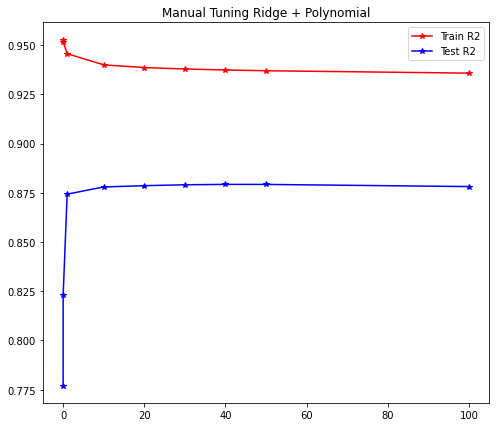

In [196]:
plt.figure(figsize=(8,7))
plt.plot(param_a, train_r, 'r*-')
plt.plot(param_a, test_r, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.title("Manual Tuning Ridge + Polynomial")
plt.show()

In [197]:
param_a[np.argmax(test_r)] ## To find maximum Alpha Value on Testing set

40

In [198]:
Model_R_tuned = Ridge(alpha = 40) ## 40 is the maximum alpha value

In [199]:
## Create def for Manual Tuning

def Manual_Tune(Alpha, X_train, X_test, y_train, y_test, Model):
    train_r = []
    test_r = []

    for i in Alpha:
        model_R = Model(alpha=i)
        model_R.fit(X_train, y_train)
        y_pred_tr = model_R.predict(X_train)
        R2_train = r2_score(y_train,y_pred_tr)
        train_r.append(R2_train)
        y_pred_ts = model_R.predict(X_test)
        R2_test = r2_score(y_test, y_pred_ts)
        test_r.append(R2_test)

    return train_r, test_r

In [200]:
Alpha = np.arange(0, 3, 0.001) ## Create Alpha list

In [201]:
## Tuning for Ridge algorithm

In [202]:
train_Ridge, test_Ridge = Manual_Tune(Alpha, df_XtrainPoly, df_XtestPoly, y_train, y_test, Ridge)

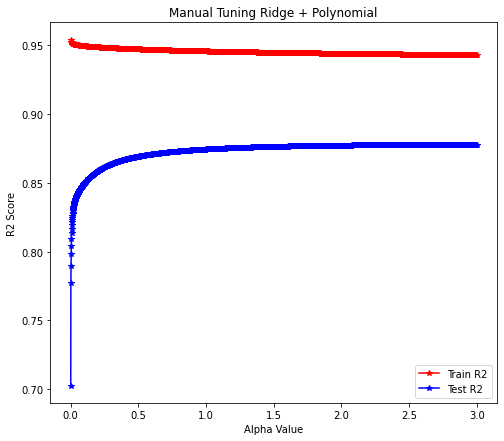

In [203]:
plt.figure(figsize=(8,7))
plt.plot(Alpha, train_Ridge, 'r*-')
plt.plot(Alpha, test_Ridge, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.title("Manual Tuning Ridge + Polynomial")
plt.xlabel('Alpha Value')
plt.ylabel('R2 Score')
plt.show()

In [204]:
Alpha[np.argmax(test_Ridge)]

2.999

In [205]:
## Train model (Ridge) with Tuning Results

In [206]:
Model_R_Tuned = Ridge(alpha=2.999)

In [207]:
Model_R_Tuned.fit(df_XtrainPoly, y_train)

Ridge(alpha=2.999)

In [208]:
## Tuning for Lasso algorithm

train_lasso, test_lasso = Manual_Tune(Alpha, df_XtrainPoly, df_XtestPoly, y_train, y_test, Lasso)

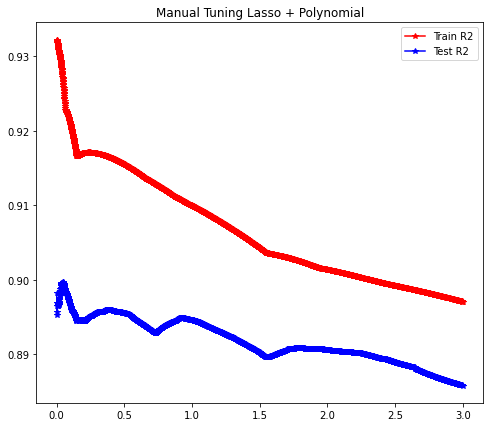

In [209]:
plt.figure(figsize=(8,7))
plt.plot(Alpha, train_lasso, 'r*-')
plt.plot(Alpha, test_lasso, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.title("Manual Tuning Lasso + Polynomial")
plt.show()

In [210]:
Alpha[np.argmax(test_lasso)]

0.046

In [211]:
## Train model (Lasso) with Tuning Results

In [212]:
Model_L_tuned = Lasso(alpha=0.046)

In [213]:
Model_L_tuned.fit(df_XtrainPoly, y_train)

Lasso(alpha=0.046)

In [214]:
## Tuning for Elasticnet algorithm

In [215]:
train_Enet, test_Enet = Manual_Tune(Alpha, df_XtrainPoly, df_XtestPoly, y_train, y_test, ElasticNet) 

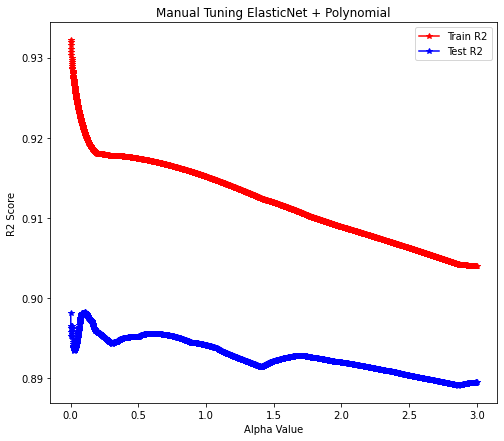

In [216]:
plt.figure(figsize=(8,7))
plt.plot(Alpha, train_Enet, 'r*-')
plt.plot(Alpha, test_Enet, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.title("Manual Tuning ElasticNet + Polynomial")
plt.xlabel('Alpha Value')
plt.ylabel('R2 Score')
plt.show()

In [217]:
Alpha[np.argmax(test_Enet)]

0.106

In [218]:
## Train model (ElasticNet) with Tuning Results

In [219]:
Model_E_tuned = ElasticNet(alpha=0.106)

In [220]:
Model_E_tuned.fit(df_XtrainPoly, y_train)

ElasticNet(alpha=0.106)

In [221]:
### Evaluation Matrix after Tuning

In [222]:
## Create def for creating evaluation matrix

def Eva_Matrix(Model, X, y_true):
    y_pred = Model.predict(X)
    R2 = r2_score(y_true, y_pred)
    MAE = mean_absolute_error(y_true, y_pred)
    MSE = mean_squared_error(y_true, y_pred)
    RMSE = np.sqrt(MSE)
    return R2, MAE, MSE, RMSE

In [223]:
## Evaluation Matrix of Ridge Training Data

r2_R_tr, MAE_R_tr, MSE_R_tr, RMSE_R_tr = Eva_Matrix(Model_R_Tuned, df_XtrainPoly, y_train)

In [224]:
## Evaluation Matrix of Ridge Testing Data

r2_R_ts, MAE_R_ts, MSE_R_ts, RMSE_R_ts = Eva_Matrix(Model_R_Tuned, df_XtestPoly, y_test)

In [225]:
## Evaluation Matrix of Lasso Training Data

r2_L_tr, MAE_L_tr, MSE_L_tr, RMSE_L_tr = Eva_Matrix(Model_L_tuned, df_XtrainPoly, y_train)

In [226]:
## Evaluation Matrix of Lasso Testing Data

r2_L_ts, MAE_L_ts, MSE_L_ts, RMSE_L_ts = Eva_Matrix(Model_L_tuned, df_XtestPoly, y_test)

In [227]:
## Evaluation Matrix of ElasticNet Training Data

r2_E_tr, MAE_E_tr, MSE_E_tr, RMSE_E_tr = Eva_Matrix(Model_E_tuned, df_XtrainPoly, y_train)

In [228]:
## Evaluation Matrix of ElasticNet Testing Data

r2_E_ts, MAE_E_ts, MSE_E_ts, RMSE_E_ts = Eva_Matrix(Model_E_tuned, df_XtestPoly, y_test)

In [229]:
eva_matrix = {
    'Poly Training' : [r2_train, MAE_train, MSE_train, RMSE_train],
    'Poly Testing' : [r2_test, MAE_test, MSE_test, RMSE_test],
    'Poly + Ridge Tuned Training' : [r2_R_tr, MAE_R_tr, MSE_R_tr, RMSE_R_tr],
    'Poly + Ridge Tuned Testing' : [r2_R_test, MAE_R_test, MSE_R_test, RMSE_R_test],
    'Poly + Lasso Tuned Training' : [r2_L_tr, MAE_L_tr, MSE_L_tr, RMSE_L_tr],
    'Poly + Lasso Tuned Testing' : [r2_L_ts, MAE_L_ts, MSE_L_ts, RMSE_L_ts],
    'Poly + Elastic Tuned Training' : [r2_E_tr, MAE_E_tr, MSE_E_tr, RMSE_E_tr],
    'Poly + Elastic Tuned Testing' : [r2_E_ts, MAE_E_ts, MSE_E_ts, RMSE_E_ts],
}

pd.DataFrame(eva_matrix, index=['R2', 'MAE', 'MSE', 'RMSE']).T

,R2,MAE,MSE,RMSE
Poly Training,0.954238,1.360326,3.397490,1.843228
Poly Testing,0.702595,2.492920,16.522338,4.064768
Poly + Ridge Tuned Training,0.942861,1.566819,4.242148,2.059647
Poly + Ridge Tuned Testing,0.874298,2.019044,6.983355,2.642604
Poly + Lasso Tuned Training,0.926501,1.788663,5.456750,2.335969
Poly + Lasso Tuned Testing,0.899743,1.771782,5.569806,2.360044
Poly + Elastic Tuned Training,0.920398,1.843169,5.909821,2.431012
Poly + Elastic Tuned Testing,0.898211,1.814071,5.654868,2.377997


### Conclusion:

The best and stable model is Lasso tuned with Polynomial Features.